<a href="https://colab.research.google.com/github/exceleapp/PengantarDataSaintis/blob/main/ExcelAnggara_205150409111004_AnalisaKebahagiaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url ='https://raw.githubusercontent.com/exceleapp/PengantarDataSaintis/main/2019.csv'

In [ ]:
#Menampilkan data dari file csv
df = pd.read_csv(url)
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Mengecek adanya kolom kosong atau null

In [ ]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Melihat jumlah kolom kosong

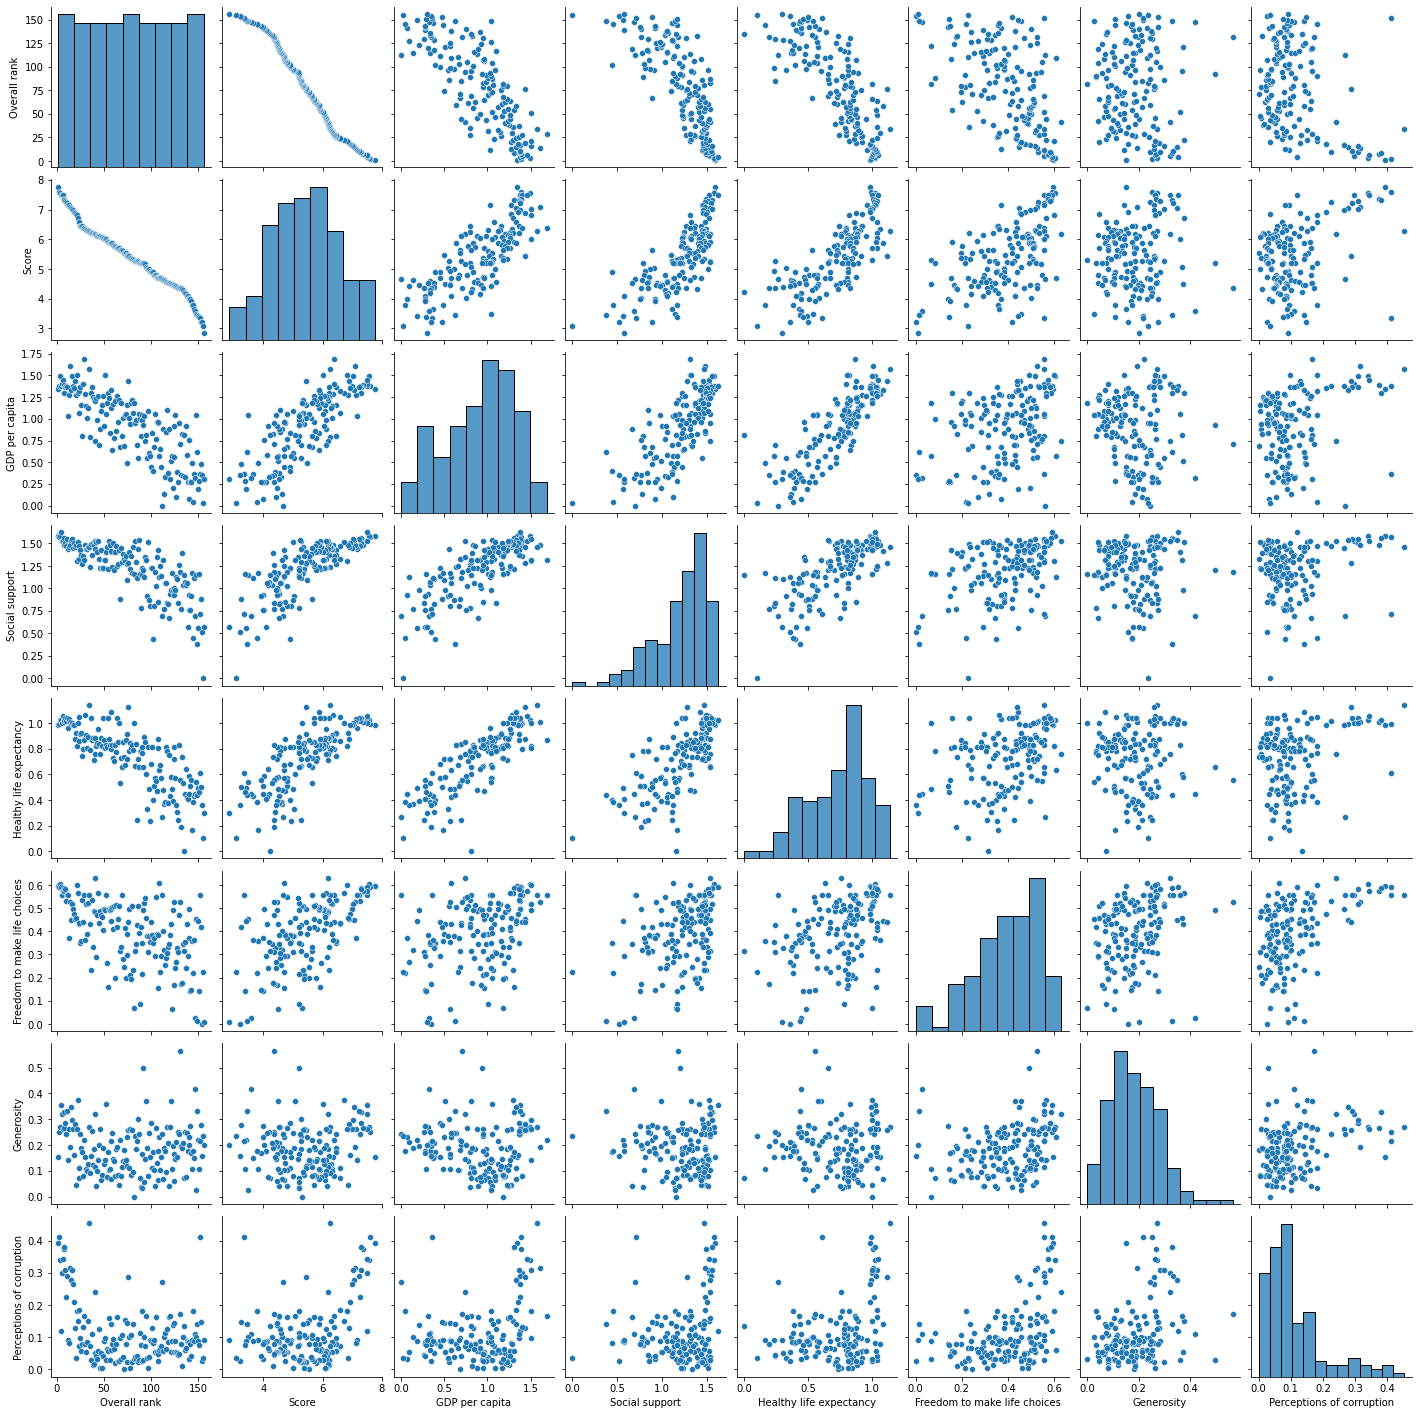

In [ ]:
sns.pairplot(df)

Melihat hubungan kolom satu dengan yang lain menggunakan pairplot

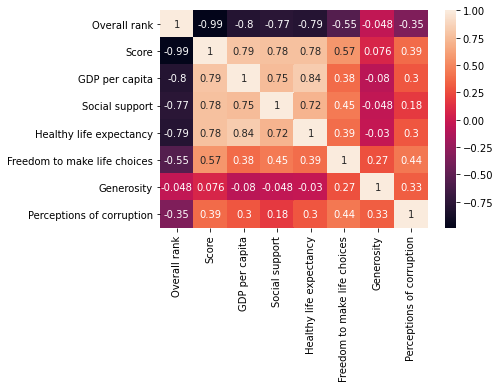

In [ ]:
sns.heatmap(df.corr(), annot=True)

Melihat hal apa yang paling mempengaruhi perhitungan Score Kebahagiaan, terlihat bahwa GDP per capita, Social Support dan Healthy life expectancy yang paling mempengaruhi Score


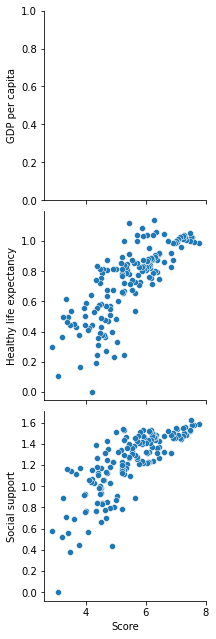

In [ ]:
sns.pairplot(data=df,height=3,x_vars=['Score'],y_vars=['GDP per capita','Healthy life expectancy','Social support'])

In [ ]:
df.corr(method='pearson',min_periods=20)['Score'].abs().sort_values(ascending=False)

Score                           1.000000
Overall rank                    0.989096
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64

Untuk melihat Corelasi antar kolom dapat menggunakan metode pearson

In [ ]:
df['Score'].describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

In [ ]:
df['GDP per capita'].describe()

count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = df.iloc[:,3:4].values
y = df.iloc[:,2:3].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Happiness Score')

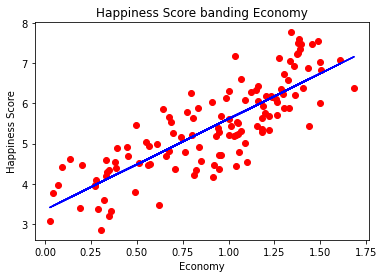

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Happiness Score banding Economy')
plt.xlabel('Economy')
plt.ylabel('Happiness Score')

Text(0, 0.5, 'Happiness Score')

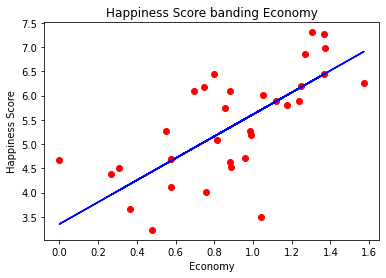

In [ ]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, regressor.predict(x_test), color='blue')
plt.title('Happiness Score banding Economy')
plt.xlabel('Economy')
plt.ylabel('Happiness Score')

**10 Negara dengan Harapan hidup sehat tertinggi**

In [ ]:
df[['Country or region', 'Healthy life expectancy']].sort_values(by = 'Healthy life expectancy',ascending = False).head(10)
#10 Negara dengan Life Expectancy tertinggi

,Country or region,Healthy life expectancy
33,Singapore,1.141
75,Hong Kong,1.122
57,Japan,1.088
29,Spain,1.062
5,Switzerland,1.052
23,France,1.045
48,Cyprus,1.042
63,Northern Cyprus,1.042
35,Italy,1.039
8,Canada,1.039


**10 Negara dengan Kedermawanan tertinggi**

In [ ]:
df[['Country or region', 'Generosity']].sort_values(by = 'Generosity',ascending = False).head(10)
#10 Negara dengan ke Dermawanan tertinggi

,Country or region,Generosity
130,Myanmar,0.566
91,Indonesia,0.498
146,Haiti,0.419
21,Malta,0.375
120,Kenya,0.372
94,Bhutan,0.370
51,Thailand,0.359
3,Iceland,0.354
14,United Kingdom,0.348
10,Australia,0.332


In [ ]:
test= df.groupby(['Country or region'])
test.describe()

Overall rank                    ... Perceptions of corruption                     
                         count   mean std    min  ...                       25%    50%    75%    max
Country or region                                 ...                                               
Afghanistan                1.0  154.0 NaN  154.0  ...                     0.025  0.025  0.025  0.025
Albania                    1.0  107.0 NaN  107.0  ...                     0.027  0.027  0.027  0.027
Algeria                    1.0   88.0 NaN   88.0  ...                     0.114  0.114  0.114  0.114
Argentina                  1.0   47.0 NaN   47.0  ...                     0.050  0.050  0.050  0.050
Armenia                    1.0  116.0 NaN  116.0  ...                     0.064  0.064  0.064  0.064
...                        ...    ...  ..    ...  ...                       ...    ...    ...    ...
Venezuela                  1.0  108.0 NaN  108.0  ...                     0.047  0.047  0.047  0.047
Vietnam                    1.0   94.0 NaN   94.0  ...                     0.073  0.073  0.073  0.073
Yemen                      1.0  151.0 NaN  151.0  ...                     0.077  0.077  0.077  0.077
Zambia                     1.0  138.0 NaN  138.0  ...                     0.087  0.087  0.087  0.087
Zimbabwe                   1.0  146.0 NaN  146.0  ...                     0.089  0.089  0.089  0.089

[156 rows x 64 columns]